In [3]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# Load data
npz = np.load("../Data/Kepler_data_train.npz",allow_pickle=True)

x_train = npz['inputs']
y_train = npz['targets']

npz = np.load("../Data/Kepler_data_test.npz",allow_pickle=True)
x_test = npz['inputs']
y_test = npz['targets']

k: 1, Train/Test Score: 1.000/0.797
k: 3, Train/Test Score: 0.912/0.815
k: 5, Train/Test Score: 0.891/0.822
k: 7, Train/Test Score: 0.883/0.816
k: 9, Train/Test Score: 0.878/0.822
k: 11, Train/Test Score: 0.868/0.819
k: 13, Train/Test Score: 0.861/0.816
k: 15, Train/Test Score: 0.859/0.816
k: 17, Train/Test Score: 0.857/0.815
k: 19, Train/Test Score: 0.855/0.819


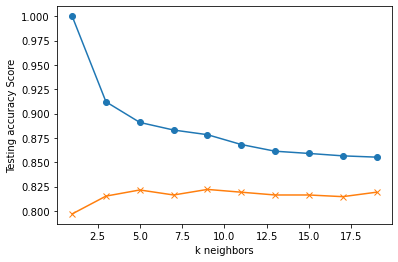

In [6]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_score = knn.score(x_train, y_train)
    test_score = knn.score(x_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [8]:
# Note that k: 5 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
print('k=5 Test Acc: %.3f' % knn.score(x_test, y_test))

k=5 Test Acc: 0.822


In [10]:
y_pred = knn.predict(x_test)

In [14]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,
                            target_names=["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.69      0.58      0.63       433
FALSE POSITIVE       0.68      0.77      0.72       475
     CANDIDATE       0.97      0.97      0.97       840

      accuracy                           0.82      1748
     macro avg       0.78      0.78      0.78      1748
  weighted avg       0.82      0.82      0.82      1748



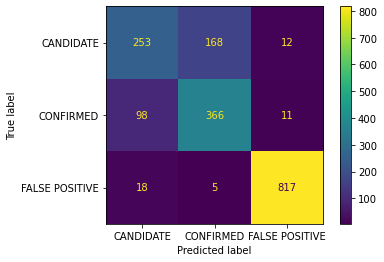

In [16]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_test, y_test)